In [ ]:
CREATE TABLE customer (
    customer_id int PRIMARY KEY,
    first_name TEXT,
    last_name TEXT,
    gender TEXT,
    DOB DATE,
    job_title text,
    job_industry_category text,
    wealth_segment TEXT,
    deceased_indicator TEXT,
    owns_car TEXT,
    address TEXT,
    postcode int,
    state text,
    country text,
    property_valuation int,
    job_id INT
    )

alter table customer drop column job_id
    
SELECT * from customer c 

create table transaction (
	transaction_id int primary key,
	product_id int,
	customer_id int,
	transaction_date date,
	online_order bool,
	order_status text,
	brand text,
	product_line text,
	product_class text,
	product_size text,
	list_price float,
	standard_cost float
)

SELECT * from "transaction" t  


In [ ]:
-- 1 запрос

select distinct(brand)
from "transaction" t 
where standard_cost > 1500

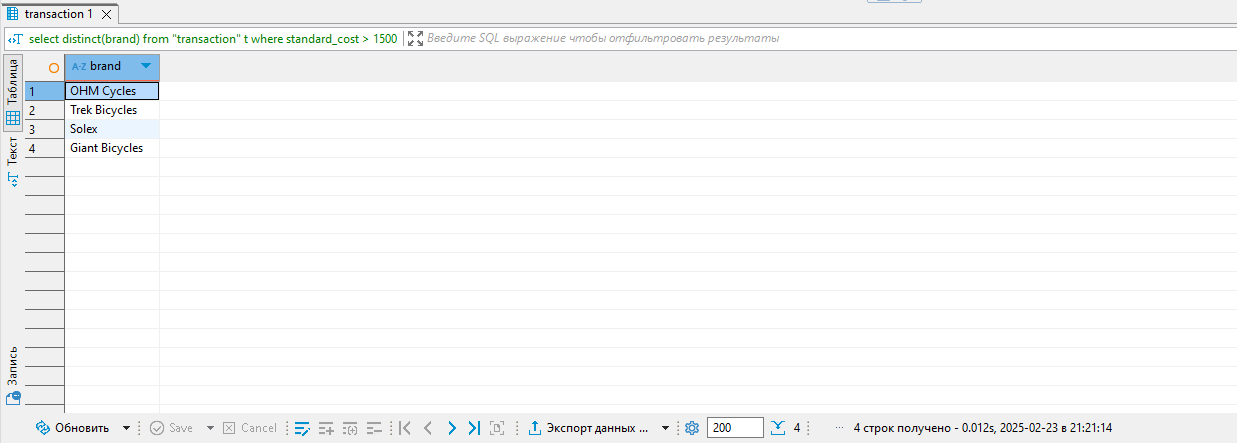

-- 2 запрос

select *
from "transaction" t 
where (order_status = 'Approved') and (t.transaction_date::date between '2017-04-01' and '2017-04-09')

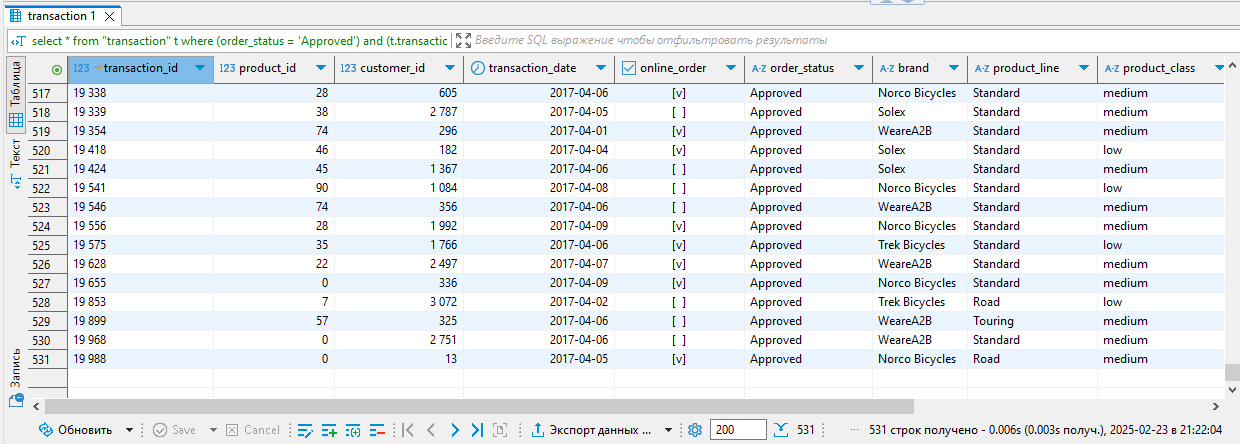

-- 3 запрос

select job_title
from customer
where (job_industry_category in ('IT', 'Financial Services')) and job_title like 'Senior%'

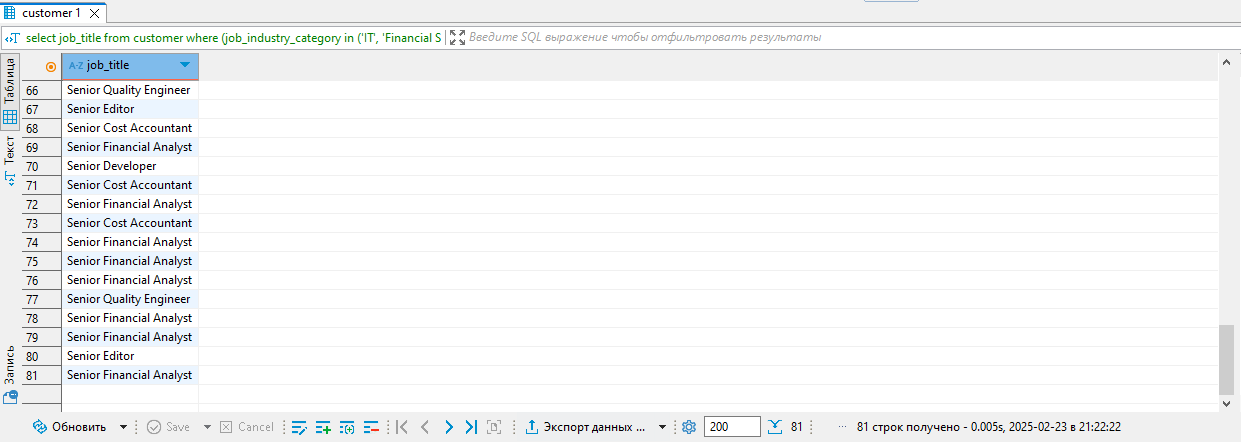

-- 4 запрос

CREATE TEMPORARY TABLE temp_customer_transaction AS
SELECT 
    c.customer_id,
    c.first_name,
    c.last_name,
    c.gender,
    c.DOB,
    c.job_title,
    c.job_industry_category,
    c.wealth_segment,
    c.deceased_indicator,
    c.owns_car,
    c.address,
    c.postcode,
    c.state,
    c.country,
    c.property_valuation,
    t.transaction_id,
    t.product_id,
    t.transaction_date,
    t.online_order,
    t.order_status,
    t.brand,
    t.product_line,
    t.product_class,
    t.product_size,
    t.list_price,
    t.standard_cost
FROM 
    customer c
INNER JOIN 
    transaction t
ON 
    c.customer_id = t.customer_id;

select distinct(brand)
from temp_customer_transaction
where job_industry_category = 'Financial Services'


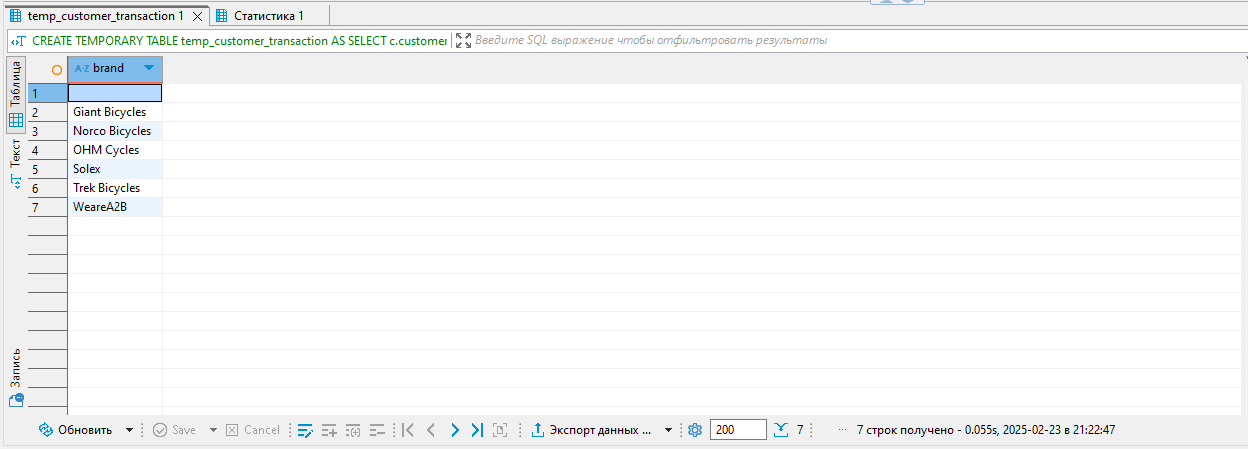

-- 5 запрос

select *
from temp_customer_transaction
where (online_order = 'True') and (brand in ('Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'))
limit 10

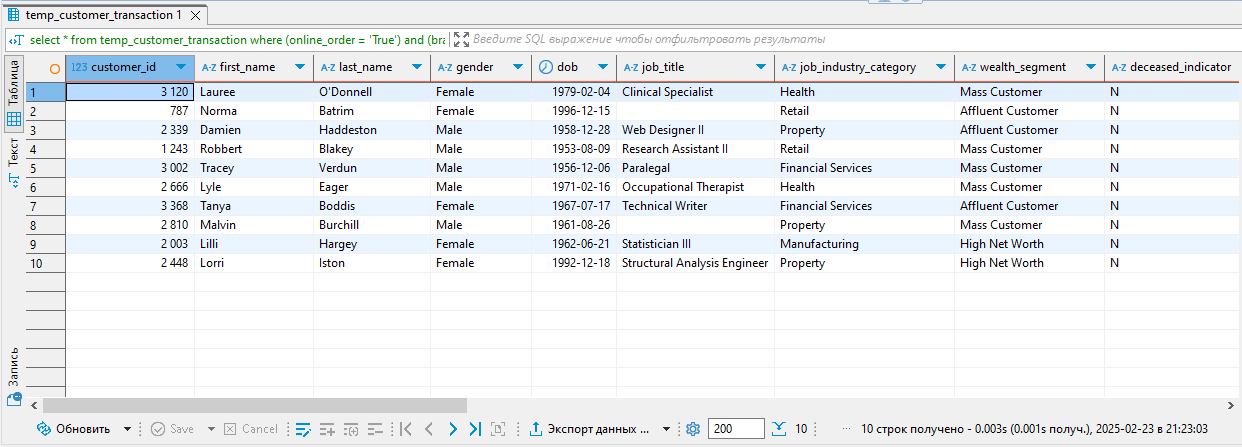

-- 6 запрос 

SELECT 
    c.customer_id,
    c.first_name,
    c.last_name,
    c.gender,
    c.DOB,
    c.job_title,
    c.job_industry_category,
    c.wealth_segment,
    c.deceased_indicator,
    c.owns_car,
    c.address,
    c.postcode,
    c.state,
    c.country,
    c.property_valuation
FROM 
    customer c
LEFT JOIN 
    transaction t
ON 
    c.customer_id = t.customer_id
WHERE 
    t.transaction_id IS null

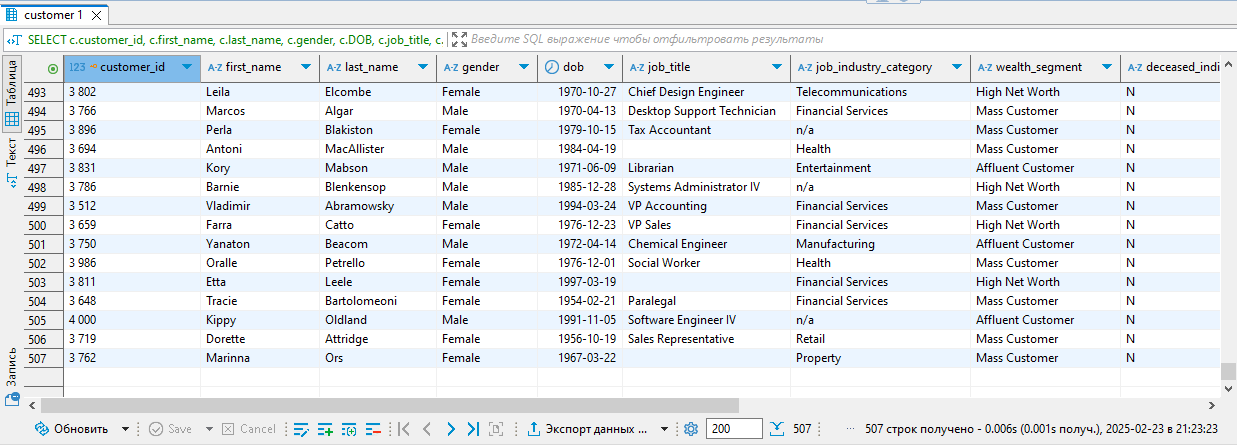

-- 7 запрос 
    
select *
from temp_customer_transaction
WHERE 
    job_industry_category = 'IT'
    AND standard_cost = (
        SELECT MAX(standard_cost)
        FROM temp_customer_transaction
        WHERE job_industry_category = 'IT'
    )
    AND standard_cost IS NOT null

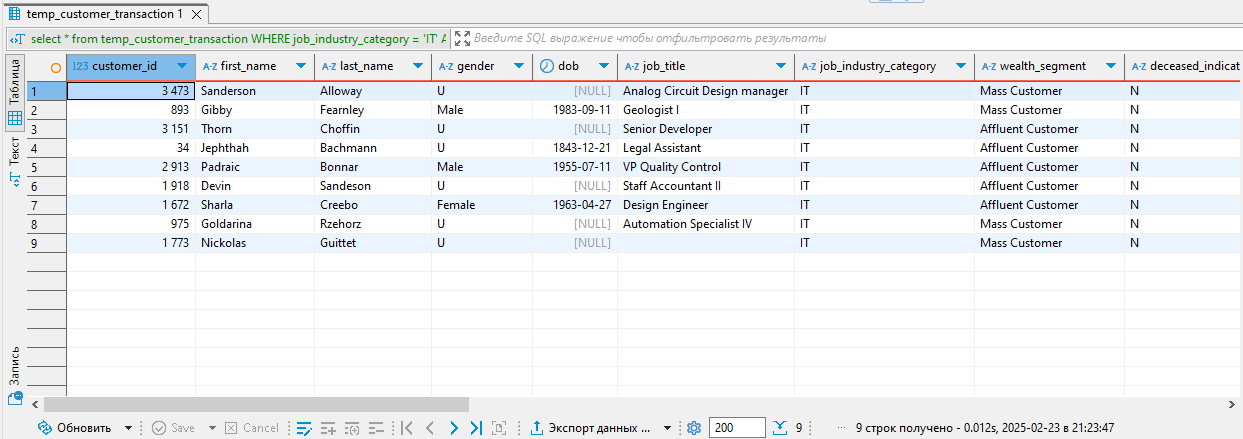

-- 8 запрос
    
select *
from temp_customer_transaction
WHERE 
    job_industry_category IN ('IT', 'Health')
    AND order_status = 'Approved'
    AND transaction_date BETWEEN '2017-07-07' AND '2017-07-17'


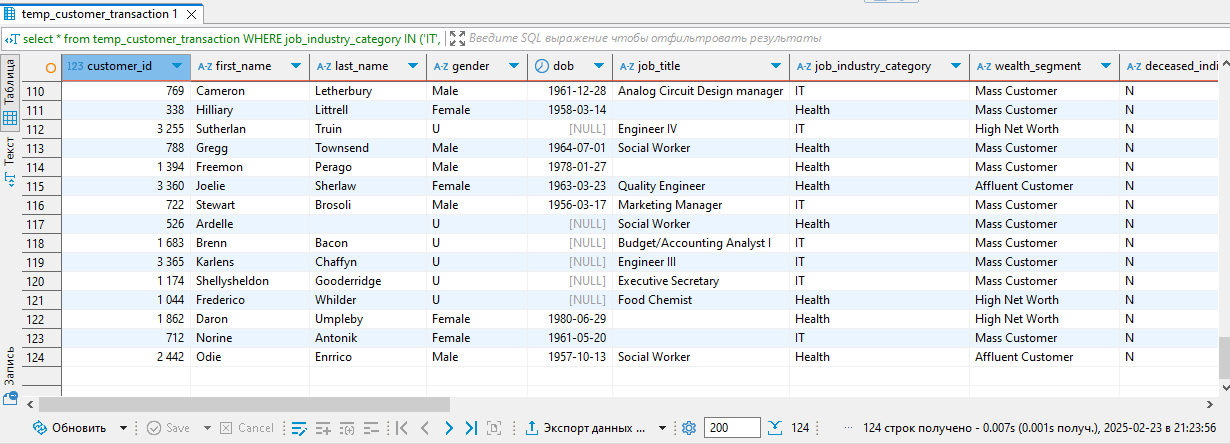